## Word Embedding
1. Let's restrict the movie reviews to the top 10,000 most common words and cut off the reviews after only 20 words. 
2. The network will learn 8-dimensional embeddings for each of the 10,000 words, turn the input integer sequences (2D integer tensor) into embedded sequences (3D float tensor), 
3. flatten the tensor to 2D, 
4. and train a single Dense layer on top for classification.

When you instantiate an Embedding layer, ***its weights (its internal dictionary of token vectors) are initially random, just as with any other layer***. During training, these **word vectors are gradually adjusted via backpropagation**. Once fully trained, the embedding space will show a lot of structure — a kind of structure specialized for the specific problem for which you’re training your model

In [3]:
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

In [4]:
max_features = 10000 #Number of words to consider as features
maxlen = 20 #Cuts off the text after this number of words (among the max_features most common words)

In [5]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 
#num_words: max number of words to include. Words are ranked by how often they occur 
#(in the training set) and only the most frequent words are kept

In [6]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [26]:
print(x_train.shape, x_test.shape)

((25000,), (25000,))


In [8]:
print(len(x_train[0]), len(x_train[1]))

(218, 189)


In [9]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
#Pads each sequence to the same length (length of the longest sequence)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [10]:
print(x_train.shape, x_test.shape)

((25000, 20), (25000, 20))


In [11]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) #vocabulary size, Dimension of the dense embedding, Length of input sequences
model.add(Flatten()) #Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples,maxlen * 8)
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 147us/step - loss: 0.6759 - acc: 0.6042 - val_loss: 0.6398 - val_acc: 0.6808

### In conclusion,
1. ~74%, which is pretty good considering that you’re only looking at the first 20 words in every review.
2. Embedded sequences and training a single Dense layer on top leads to a model that treats each word in the input sequence separately, without considering inter-word relationships and sentence structure (for example, this model would likely treat both **this movie is a bomb** and **this movie is the bomb** as being negative reviews).
3. **It’s much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account each sequence as a whole.**

## Pretrained Word Embedding
The rationale behind using pretrained word embeddings in natural-language processing is much the same as for using pretrained convnets in image classification: **you don’t have enough data available to learn truly powerful features on your own**, but you **expect the features that you need to be fairly generic**—that is, common visual features or semantic features. In this case, it makes sense to reuse features learned on a different problem.

###  Let’s look at how you can get started using GloVe embeddings in a Keras model
Homework (Lista 4)

## Recurrent Neural Network Classification

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
#SimpleRNN processes batches of sequences (inputs of shape (batch_size, timesteps, input_features))

### as we said, by adding a RNN on the top of the embedded sequences we can learn features that considers the entire sequence

In [34]:
model = Sequential()
model.add(Embedding(10000, 32)) #Dimension of the dense embedding = num_features=32
model.add(SimpleRNN(32)) #num_units=32
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


### How to compute the number of parameters in a SimpleRNN?
1. Recurrent weights: num_units*num_units
2. Input weights: num_features*num_units
3. bias = num_units

In total, 32 x 32 + 32 x 32 + 32 = 2080

In [23]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True)) # Whether to return the last output in the output sequence, or the full sequence.
model.add(Dense(2, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
dense_3 (Dense)              (None, None, 1)           33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


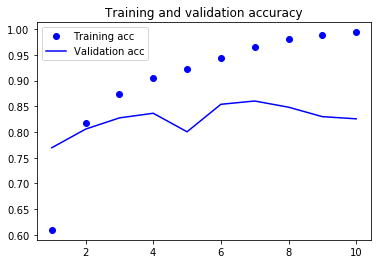

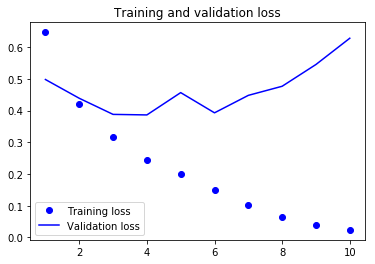

In [42]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### It’s sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. In such a setup, you have to get all of the intermediate layers to return full sequence of outputs:

In [20]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(2, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


### looking at the first 500 words in every review. 

In [17]:
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = preprocessing.sequence.pad_sequences(input_train, maxlen=maxlen)

input_test = preprocessing.sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
(25000, 'train sequences')
(25000, 'test sequences')
Pad sequences (samples x time)
('input_train shape:', (25000, 500))
('input_test shape:', (25000, 500))


In [21]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,epochs=10,batch_size=64,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 645s 32ms/step - loss: 0.6798 - acc: 0.5507 - val_loss: 0.5703 - val_acc: 0.7024

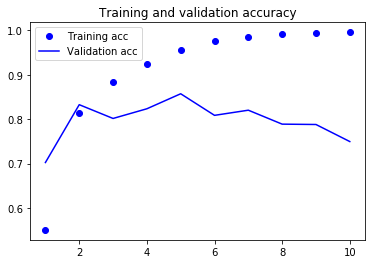

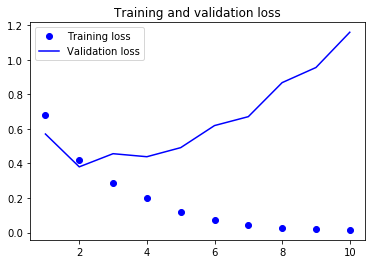

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

###  SimpleRNN isn’t good at processing long sequences, such as text. Other types of recurrent layers perform much better, like LSTM. 